In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive


In [ ]:
!pwd

/content/gdrive/My Drive


In [ ]:
from getpass import getpass
import os

user = getpass('User')
password = getpass('Password')
os.environ['GIT_AUTH'] = user + ':' + password

!git clone https://$GIT_AUTH@github.com/Ace95/DeepLearning_Project.git  

User··········
Password··········
Cloning into 'DeepLearning_Project'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 203161 (delta 19), reused 48 (delta 12), pack-reused 203103
Receiving objects: 100% (203161/203161), 1.44 GiB | 11.05 MiB/s, done.
Resolving deltas: 100% (371/371), done.
Checking out files: 100% (40058/40058), done.


Let's get the machine GPU information

In [ ]:
# nicolaasRuberg 3bX_zwW03
!nvidia-smi

Wed Jul 15 08:11:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Change to directory of our code

In [ ]:
%cd /content/gdrive/My\ Drive/DeepLearning_Project/VGG19/
!pwd

/content/gdrive/My Drive/DeepLearning_Project/VGG19
/content/gdrive/My Drive/DeepLearning_Project/VGG19


## Import and initialization

In [ ]:
"""
Created on Fri Apr 17 15:40:21 2020

@author: Nicolaas Ruberg
"""
import os
import pandas as pd
import matplotlib.pyplot as plt

def save_history(history,fileName):
    hist_df = pd.DataFrame(history)
    with open(fileName,mode='w') as f:
        hist_df.to_csv(f)

def save_elapsedTime(elapsedTime,fileName):
    f = open(fileName,'a+')
    f.write('%%Elapsed Time: {:.2f}m. \n'.format(elapsedTime/60))
    f.close()
        
def find_next_file_history(dirHistory, fileName):
    if not os.path.exists(dirHistory):
        os.makedirs(dirHistory)
    files = os.listdir(dirHistory)
    if len(files) > 0:
        for f in files:
            if f.endswith('.csv'):
                return (dirHistory+'/'+fileName[0:fileName.find('.')]
                        +'_' + str(len(files)) +'.csv')
            else:
                return (dirHistory+'/'+fileName)
    else:
        return (dirHistory+'/'+fileName)

            
    

    
def show_history(history):
# Variable names differ from Keras(2.2.4) and tf.keras(2.2.4-tf)
# Keras os acc and tf.keras is accuracy
    ACC = 'acc' # for keras
    VAL_ACC = 'val_acc'
#    ACC = 'accuracy' # for tensorflow.keras
#    VAL_ACC = 'val_accuracy'    plt.title('Training and validation accuracy')
    plt.plot(history.history[ACC]) # on keras wo tensorflow the parameter is 'acc'
    plt.plot(history.history[VAL_ACC]) # on keras wo tensorflow the parameter is 'acc'
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training accuracy', 'Validation accuracy'], loc='best')
    
    plt.figure()
    plt.title('Training and validation loss')
    plt.plot(history.history['loss'], 'red', label='Training loss')
    plt.plot(history.history['val_loss'], 'blue', label='Validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training loss', 'Validation loss'], loc='best')
    plt.savefig('./models/plot_history.png')
    plt.show()
    # Let's save our result for further analysi
  
    

In [ ]:
import time
import keras
import pandas as pd
import matplotlib.pyplot as plt
from numpy import asarray
from keras.utils import to_categorical
from keras.preprocessing.image  import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input

from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers
#from  myUtils import find_next_file_history, save_history, show_history, save_elapsedTime



trainDIR='../orient/train'
valDIR='../orient/valid'
testDIR='../orient/test'
# imgHeight=224 #218
# imgWidth=224 #178
imgHeight=218
imgWidth=178
imageShape=(imgHeight,imgWidth) #Celeba croped image shape

histFileName = 'historyVGG19.csv'
dirHistFileName = './history'

numEpochs=20

In [ ]:
start = time.time()

vgg = VGG19(input_shape=imageShape+(3,), include_top = False, weights = "imagenet", classes = 1000,
                            backend=keras.backend, layers=keras.layers,
                            models=keras.models,utils=keras.utils) # this line imports the VGG19 model trained on imagenet dataset and discard the last 1000 neurons layer 

output=vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input,output)

# We want to use the pre-trained weights
vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False
        
##
input_shape = vgg_model.output_shape[1]

model = keras.models.Sequential()
model.add(vgg_model)
model.add(keras.layers.InputLayer(input_shape=(input_shape,)))
model.add(Dense(512,activation='relu',input_dim=input_shape))
model.add(Dropout(0.7))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['acc'])
print(model.summary())


layers = [(layer.name, layer.trainable) for layer in model.layers]
print(pd.DataFrame(layers, columns=['Layer Name', 'Layer Trainable']))


80142336/80134624 [==============================] - 7s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 15360)             20024384  
_________________________________________________________________
input_2 (InputLayer)         (None, 15360)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               7864832   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_______________________________________________________

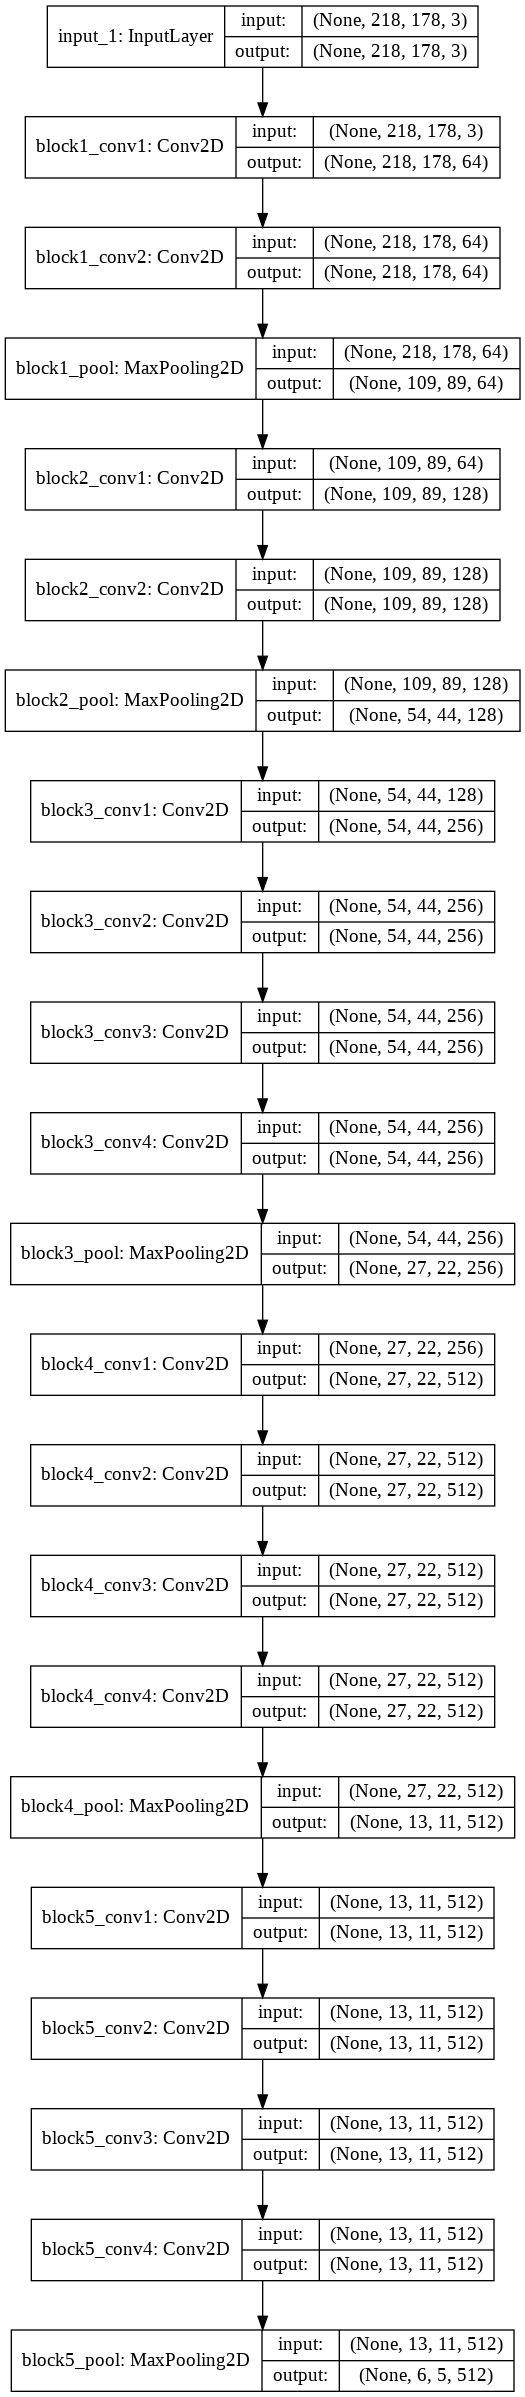

In [ ]:
# Let's display our CNN strucutre
from keras.utils.vis_utils import plot_model
plot_model(vgg, to_file='./models/vgg19.png', show_shapes=True, show_layer_names=True)

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_it = train_datagen.flow_from_directory(
    directory=trainDIR,
    target_size=imageShape,
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

val_it = train_datagen.flow_from_directory(
    directory=valDIR,
    target_size=imageShape,
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

Found 8383 images belonging to 3 classes.
Found 1811 images belonging to 3 classes.


In [ ]:
step_size_train = train_it.n//train_it.batch_size
step_size_val = val_it.n//val_it.batch_size

history = model.fit_generator(generator=train_it,steps_per_epoch=step_size_train,
                    epochs=numEpochs,
                    validation_data=val_it,
                    validation_steps=step_size_val
                    )


model.save('./models/VGG19_celeba_model.h5')

##    
end = time.time()
elapsedTime= (end - start)
print('Elapsed Time:')
print("\t\t{:.2f}m".format(elapsedTime/60))

Epoch 1/20
261/261 [==============================] - 103s 393ms/step - loss: 4.9329 - acc: 0.6148 - val_loss: 0.6885 - val_acc: 0.7360
Epoch 2/20
261/261 [==============================] - 94s 362ms/step - loss: 1.3969 - acc: 0.6943 - val_loss: 0.5671 - val_acc: 0.7279
Epoch 3/20
261/261 [==============================] - 93s 355ms/step - loss: 1.3213 - acc: 0.7224 - val_loss: 0.5804 - val_acc: 0.7111
Epoch 4/20
261/261 [==============================] - 93s 355ms/step - loss: 1.0968 - acc: 0.7349 - val_loss: 0.6433 - val_acc: 0.7493
Epoch 5/20
261/261 [==============================] - 93s 355ms/step - loss: 1.0035 - acc: 0.7395 - val_loss: 0.9236 - val_acc: 0.7656
Epoch 6/20
261/261 [==============================] - 93s 355ms/step - loss: 1.0237 - acc: 0.7461 - val_loss: 0.7141 - val_acc: 0.7555
Epoch 7/20
261/261 [==============================] - 92s 354ms/step - loss: 0.8847 - acc: 0.7631 - val_loss: 0.6766 - val_acc: 0.7752
Epoch 8/20
261/261 [==============================] - 

In [ ]:
# Don't run... We need a test set
#score1 = vgg.evaluate(X_test, y_test, verbose=0)
#print('Test loss:', score1[0])
#print('Test accuracy:', score1[1])
# Don't run... We need a test set
testDIR='../orient/test'
val_test = train_datagen.flow_from_directory(
    directory=testDIR,
    target_size=imageShape,
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)


step_size_val = val_test.n//val_test.batch_size
score1 = model.evaluate_generator(generator=val_test,steps=step_size_val)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Found 1005 images belonging to 3 classes.
Test loss: 0.5550078749656677
Test accuracy: 0.8296371102333069


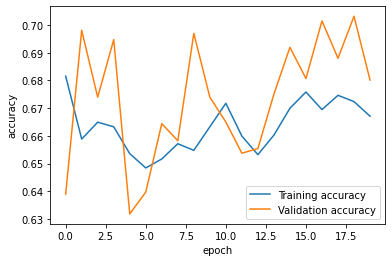

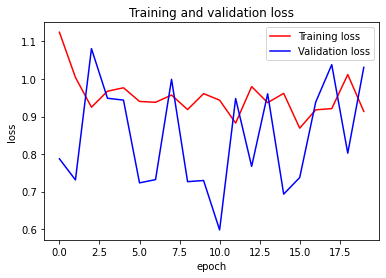

In [ ]:
show_history(history)
finalHistoryFile=find_next_file_history(dirHistFileName,histFileName)
save_history(history.history,finalHistoryFile)

save_elapsedTime(elapsedTime,finalHistoryFile)


In [ ]:
# Now let's try it with some Data augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range=0, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)

# load and iterate training dataset
train_it = train_datagen.flow_from_directory(trainDIR,
                                                    target_size=imageShape,
                                                    color_mode='rgb',
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    shuffle= True)

val_it = train_datagen.flow_from_directory(valDIR,
    target_size=imageShape,
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)



Found 8383 images belonging to 3 classes.
Found 1811 images belonging to 3 classes.


In [ ]:
start = time.time()
numEpochs = 20
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['acc'])
step_size_train = train_it.n//train_it.batch_size
step_size_val = val_it.n//val_it.batch_size

history = model.fit_generator(generator=train_it,steps_per_epoch=step_size_train,
                    epochs=numEpochs,
                    validation_data=val_it,
                    validation_steps=step_size_val
                    )
model.save('./models/VGG19_celeba_model.h5')
end = time.time()
elapsedTime= (end - start)
print("Elapsed Time:")
print("\t\t{:.2f}m".format(elapsedTime/60))


Epoch 1/20
261/261 [==============================] - 142s 543ms/step - loss: 1.1243 - acc: 0.6816 - val_loss: 0.7874 - val_acc: 0.6390
Epoch 2/20
261/261 [==============================] - 142s 546ms/step - loss: 1.0042 - acc: 0.6588 - val_loss: 0.7312 - val_acc: 0.6981
Epoch 3/20
261/261 [==============================] - 141s 542ms/step - loss: 0.9247 - acc: 0.6650 - val_loss: 1.0807 - val_acc: 0.6740
Epoch 4/20
261/261 [==============================] - 141s 540ms/step - loss: 0.9674 - acc: 0.6633 - val_loss: 0.9486 - val_acc: 0.6948
Epoch 5/20
261/261 [==============================] - 141s 542ms/step - loss: 0.9765 - acc: 0.6536 - val_loss: 0.9437 - val_acc: 0.6318
Epoch 6/20
261/261 [==============================] - 140s 537ms/step - loss: 0.9402 - acc: 0.6484 - val_loss: 0.7234 - val_acc: 0.6397
Epoch 7/20
261/261 [==============================] - 140s 538ms/step - loss: 0.9379 - acc: 0.6517 - val_loss: 0.7320 - val_acc: 0.6644
Epoch 8/20
261/261 [============================

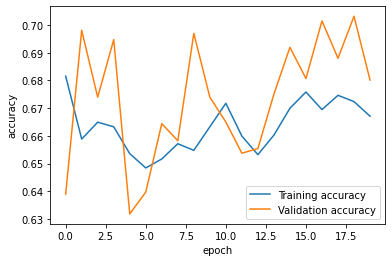

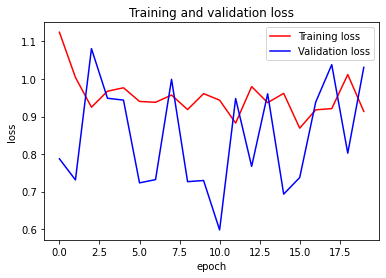

In [ ]:
show_history(history)
finalHistoryFile=find_next_file_history(dirHistFileName,histFileName)
save_history(history.history,finalHistoryFile)

save_elapsedTime(elapsedTime,finalHistoryFile)

In [ ]:
testDIR='../orient/test'
val_test = train_datagen.flow_from_directory(
    directory=testDIR,
    target_size=imageShape,
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)


step_size_val = val_test.n//val_test.batch_size
score1 = model.evaluate_generator(generator=val_test,steps=step_size_val)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Found 1005 images belonging to 3 classes.
Test loss: 2.220151901245117
Test accuracy: 0.711693525314331


In [ ]:
# Different VGG19 structure 
# Applying TransferLearning, we freeze the base layer and retrain the one o nthe top
start = time.time()

vgg = VGG19(input_shape=imageShape+(3,), include_top = False, weights = "imagenet", classes = 1000,
                            backend=keras.backend, layers=keras.layers,
                            models=keras.models,utils=keras.utils) # this line imports the VGG19 model trained on imagenet dataset and discard the last 1000 neurons layer 
x = vgg.output 
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.7)(x)
x = Dense (512,activation='relu')(x)
x = Dropout(0.7)(x)
x = Dense (512,activation='relu')(x)
preds = Dense(3,activation='softmax')(x)  # Note that number of neurons in the last layer depends on the number of classes you want to detect
model = Model(inputs=vgg.input,outputs=preds)

# We want to use the pre-trained weights

for layer in model.layers[:22]:
    layer.trainable=False
for layer in model.layers[22:]:
    layer.trainable=True


layers = [(layer.name, layer.trainable) for layer in model.layers]
print(pd.DataFrame(layers, columns=['Layer Name', 'Layer Trainable']))


                    Layer Name  Layer Trainable
0                      input_4            False
1                 block1_conv1            False
2                 block1_conv2            False
3                  block1_pool            False
4                 block2_conv1            False
5                 block2_conv2            False
6                  block2_pool            False
7                 block3_conv1            False
8                 block3_conv2            False
9                 block3_conv3            False
10                block3_conv4            False
11                 block3_pool            False
12                block4_conv1            False
13                block4_conv2            False
14                block4_conv3            False
15                block4_conv4            False
16                 block4_pool            False
17                block5_conv1            False
18                block5_conv2            False
19                block5_conv3          

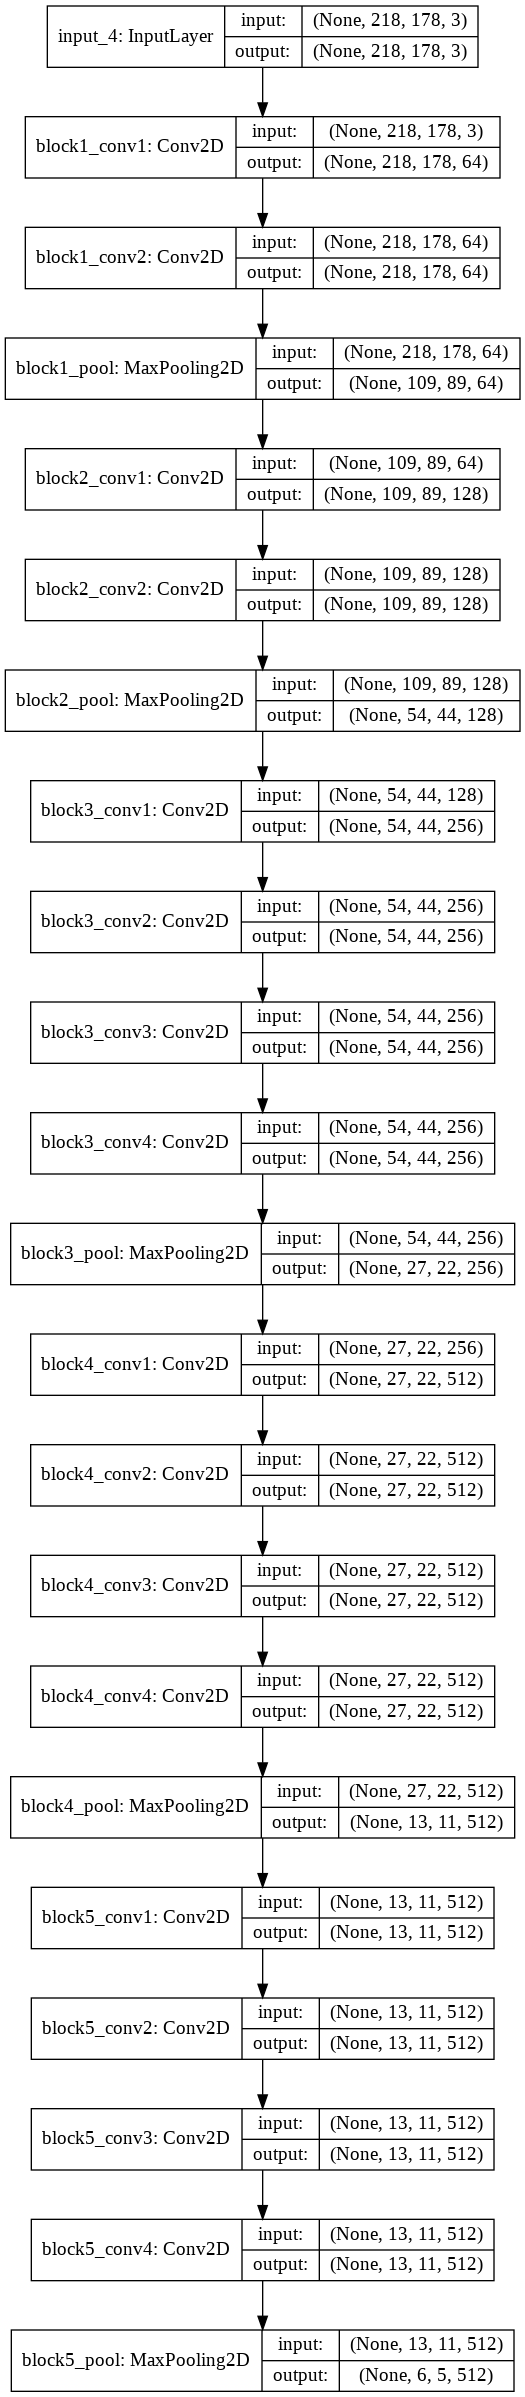

In [ ]:
# Let's display our CNN strucutre
from keras.utils.vis_utils import plot_model
plot_model(vgg, to_file='./models/vgg19.png', show_shapes=True, show_layer_names=True)

In [ ]:

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# load and iterate training dataset
train_it = train_datagen.flow_from_directory(
    directory=trainDIR,
    target_size=imageShape,
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

val_it = train_datagen.flow_from_directory(
    directory=valDIR,
    target_size=imageShape,
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

Found 8383 images belonging to 3 classes.
Found 1811 images belonging to 3 classes.


In [ ]:
# Lets re-traing the top layers, this step may require some time depending on yor PC/GPU 
start = time.time()
numEpochs = 20
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['acc'])
step_size_train = train_it.n//train_it.batch_size
step_size_val = val_it.n//val_it.batch_size

history = model.fit_generator(generator=train_it,steps_per_epoch=step_size_train,
                    epochs=numEpochs,
                    validation_data=val_it,
                    validation_steps=step_size_val
                    )


model.save('./models/VGG19_celeba_model-2.h5')
##    
end = time.time()
elapsedTime= (end - start)
print('Elapsed Time:')
print("\t\t{:.2f}m".format(elapsedTime/60))

Epoch 1/20
261/261 [==============================] - 91s 349ms/step - loss: 0.9419 - acc: 0.6033 - val_loss: 0.9505 - val_acc: 0.6083
Epoch 2/20
261/261 [==============================] - 90s 346ms/step - loss: 0.8661 - acc: 0.6318 - val_loss: 0.9086 - val_acc: 0.6048
Epoch 3/20
261/261 [==============================] - 90s 346ms/step - loss: 0.8145 - acc: 0.6523 - val_loss: 0.8793 - val_acc: 0.6346
Epoch 4/20
261/261 [==============================] - 90s 346ms/step - loss: 0.7963 - acc: 0.6657 - val_loss: 0.9096 - val_acc: 0.6290
Epoch 5/20
261/261 [==============================] - 91s 347ms/step - loss: 0.7566 - acc: 0.6827 - val_loss: 0.6329 - val_acc: 0.6464
Epoch 6/20
261/261 [==============================] - 91s 347ms/step - loss: 0.7428 - acc: 0.6905 - val_loss: 0.7414 - val_acc: 0.6740
Epoch 7/20
261/261 [==============================] - 91s 347ms/step - loss: 0.7179 - acc: 0.7010 - val_loss: 0.7555 - val_acc: 0.6211
Epoch 8/20
261/261 [==============================] - 9

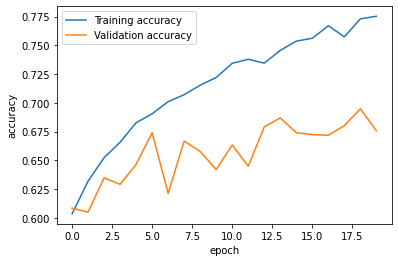

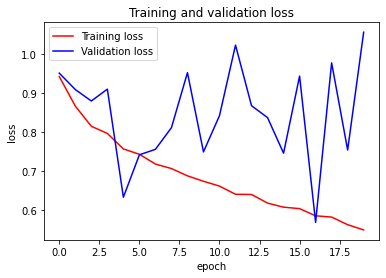

In [ ]:
show_history(history)
finalHistoryFile=find_next_file_history(dirHistFileName,histFileName)
save_history(history.history,finalHistoryFile)
save_elapsedTime(elapsedTime,finalHistoryFile)

In [ ]:
# Don't run... We need a test set
testDIR='../orient/test'
val_test = train_datagen.flow_from_directory(
    directory=testDIR,
    target_size=imageShape,
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)


step_size_val = val_test.n//val_test.batch_size
score1 =model.evaluate_generator(generator=val_test,steps=step_size_val)

print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Found 1005 images belonging to 3 classes.
Test loss: 0.7636425495147705
Test accuracy: 0.7086693644523621
